In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df = pd.read_csv('kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [31]:
df[['price','grade']].describe().round(decimals=2)

,price,grade
count,21597.00,21597.00
mean,540296.57,7.66
std,367368.14,1.17
min,78000.00,3.00
25%,322000.00,7.00
50%,450000.00,7.00
75%,645000.00,8.00
max,7700000.00,13.00


In [32]:
df[['price','grade']].mode()

,price,grade
0,350000.0,7.0
1,450000.0,NaN


In [33]:
df[['price','grade']].median()

price    450000.0
grade         7.0
dtype: float64

C:\Users\Chitito Audithio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


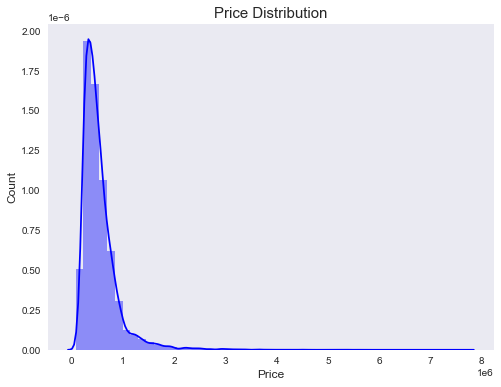

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(df['price'],color='blue')
plt.title('Price Distribution',size=15)
plt.ylabel('Count',size=12)
plt.xlabel('Price',size=12)
plt.grid()
plt.show()

C:\Users\Chitito Audithio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


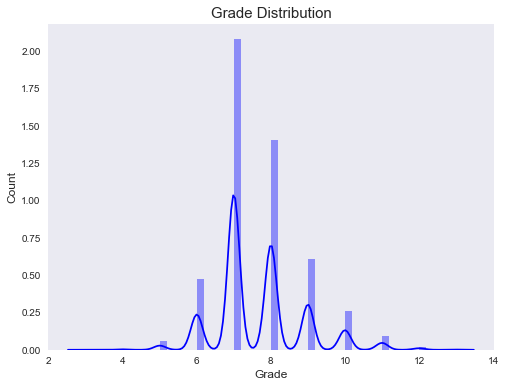

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(df['grade'],color='blue')
plt.title('Grade Distribution',size=15)
plt.ylabel('Count',size=12)
plt.xlabel('Grade',size=12)
plt.grid()
plt.show()

In [36]:
df['sqft_living'].describe().round(decimals=2)

count    21597.00
mean      2080.32
std        918.11
min        370.00
25%       1430.00
50%       1910.00
75%       2550.00
max      13540.00
Name: sqft_living, dtype: float64

In [37]:
q1 = 1430.00
q3 = 2550.00
iqr = q3 - q1
lb = q1 - (1.5*iqr);print(lb)
ub = q3 + (1.5*iqr);print(ub)

-250.0
4230.0


In [38]:
TrueDF = df[(df['sqft_living'] > lb) & (df['sqft_living'] < ub)]

In [39]:
BelowDF = df[df['sqft_living']< lb]
BelowDF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [40]:
AboveDF = df[df['sqft_living'] > ub]
AboveDF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
70,1525059190,9/12/2014,1040000.0,5,3.25,4770,50094,1.0,0,0,...,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917
115,3626039325,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0,0,...,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350
153,7855801670,4/1/2015,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
239,5152100060,5/29/2014,472000.0,6,2.50,4410,14034,1.0,0,2,...,9,2350,2060,1965,0,98003,47.3376,-122.324,2600,13988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21535,1561750040,12/24/2014,1380000.0,5,4.50,4350,13405,2.0,0,0,...,11,4350,0,2014,0,98074,47.6018,-122.060,3990,7208
21545,6664500090,1/15/2015,750000.0,5,4.00,4500,8130,2.0,0,0,...,10,4500,0,2007,0,98059,47.4832,-122.145,2840,8402
21560,9253900271,1/7/2015,3570000.0,5,4.50,4850,10584,2.0,1,4,...,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270
21574,7430200100,5/14/2014,1220000.0,4,3.50,4910,9444,1.5,0,0,...,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063


In [63]:
clean = df[df['sqft_living'] < ub]
clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


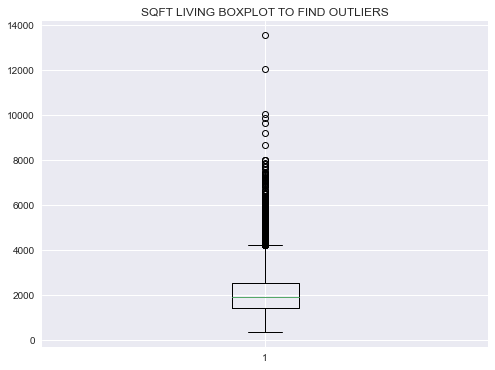

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
plt.boxplot(df['sqft_living'])
plt.title('SQFT LIVING BOXPLOT TO FIND OUTLIERS')
ax.grid()
plt.grid()

C:\Users\Chitito Audithio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


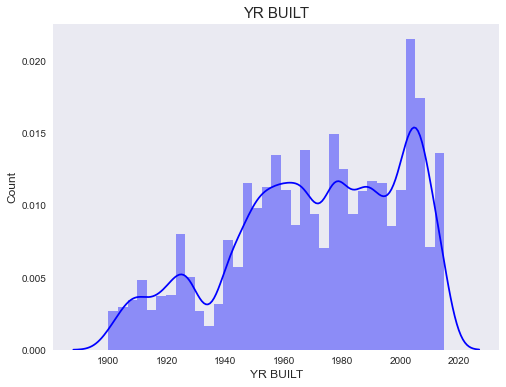

In [42]:
plt.figure(figsize=(8,6))
sns.distplot(df['yr_built'],color='blue')
plt.title('YR BUILT',size=15)
plt.ylabel('Count',size=12)
plt.xlabel('YR BUILT',size=12)
plt.style.use('seaborn')
plt.grid()
plt.show()

In [43]:
dataG = df[['grade','price']].corr(method='pearson') #menggunkana pearson karena angka float
dataG
# plt.figure(figsize=(8,6))
# sns.heatmap(data, annot=True)
# plt.title('Heatmap Korelasi GRADE, SQFT_LOT, CONDITION')
# plt.show()

,grade,price
grade,1.000000,0.667951
price,0.667951,1.000000


In [44]:
dataS = df[['sqft_lot','price']].corr(method='pearson') #menggunkana pearson karena angka float
dataS

,sqft_lot,price
sqft_lot,1.000000,0.089876
price,0.089876,1.000000


In [45]:
dataC = df[['condition','price']].corr(method='pearson') #menggunkana pearson karena angka float
dataC

,condition,price
condition,1.000000,0.036056
price,0.036056,1.000000


Text(0, 0.5, 'Score')

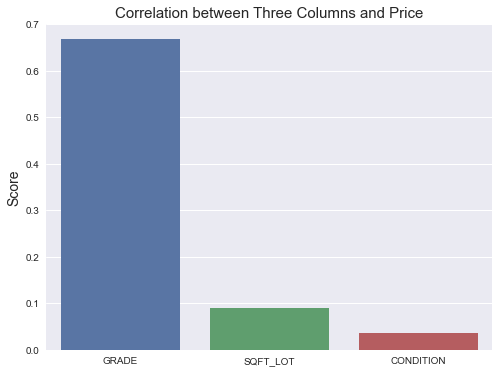

In [46]:
g = 0.667951
s = 0.089876
c = 0.036056

Data = {'GRADE' : [g],'SQFT_LOT' : [s],'CONDITION' : [c]}
Score = {'Price'}
DataFinal = pd.DataFrame(Data, index = Score)

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(data=DataFinal)
plt.title('Correlation between Three Columns and Price',size=15)
plt.ylabel('Score',size=14)

In [47]:
mean = df['price'].mean().round(decimals=2)

In [48]:
data4 = df[df['price']>mean].head(5)
data4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '98007'),
  Text(1, 0, '98040'),
  Text(2, 0, '98053'),
  Text(3, 0, '98126'),
  Text(4, 0, '98136')])

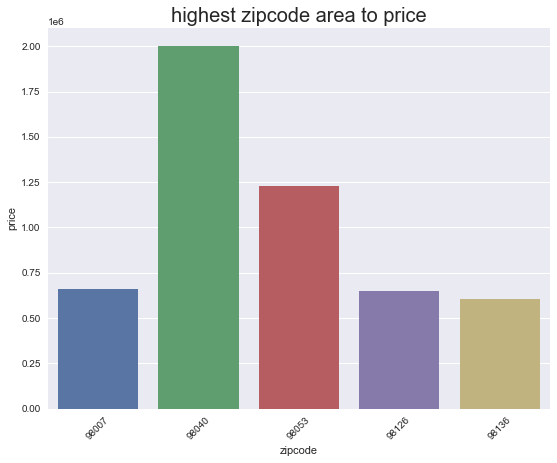

In [49]:
plt.figure(figsize=(9,7))
plt.title('highest zipcode area to price',size=20)
sns.barplot(data=data4,x='zipcode',y='price')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, '7'), Text(1, 0, '8'), Text(2, 0, '9'), Text(3, 0, '11')])

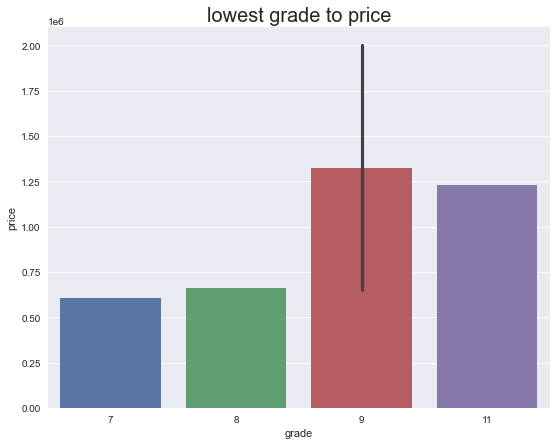

In [50]:
plt.figure(figsize=(9,7))
plt.title('lowest grade to price',size =20)
sns.barplot(data=data4,x='grade',y='price')
plt.xticks(rotation=0)

In [51]:
df['price'].mean().round(decimals=2)

540296.57

In [52]:
year = df.groupby('yr_built')

In [53]:
Mean = year['price'].mean()
Mean

yr_built
1900    581536.632184
1901    557108.344828
1902    673192.592593
1903    480958.195652
1904    583867.755556
            ...      
2011    544648.384615
2012    527436.982353
2013    678599.582090
2014    683792.685152
2015    759970.947368
Name: price, Length: 116, dtype: float64

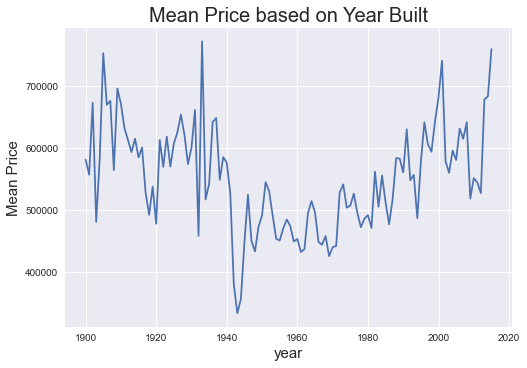

In [58]:
fig, ax = plt.subplots()
plt.plot(Mean)
plt.title('Mean Price based on Year Built',size=20)
ax.set_xlabel('year',size=15)
ax.set_ylabel('Mean Price',size=15)
plt.show()